# 라이브러리 설치

In [ ]:
# 한글로 그래프 제목 입력해도 글씨 깨지지 않게 함
# 코드 실행후 런타임 다시 시작하기!!

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 27 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 2s (5,603 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 129499 files and di

In [ ]:
import os
import requests
import json

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

plt.rc("font", family="NanumBarunGothic")
plt.rc("axes", unicode_minus=False)

# 데이터 수집

In [ ]:
sample = '52586e6e70706a683133304a4f55714d' # api 인증키
file_type = 'json'
service_name = 'BukChonInOutPeopleInfo'

# 전체 데이터의 수를 알기 위해 처음 1000개 데이터만 불러오기
url = os.path.join("http://openapi.seoul.go.kr:8088/", sample, file_type, service_name,"1","1000")

data = requests.get(url).text
dict_data = json.loads(data)
row_data = dict_data['BukChonInOutPeopleInfo']['row']
df = pd.DataFrame(row_data) # 초기 1000개의 데이터

# list_total_count 값을 알아냈기 때문에 전체 데이터 불러오기
for i in range(1001, dict_data['BukChonInOutPeopleInfo']['list_total_count'] + 1,1000):
    url = os.path.join("http://openapi.seoul.go.kr:8088/", sample, file_type, service_name, str(i), str(i+999))

    if (i + 999) > dict_data['BukChonInOutPeopleInfo']['list_total_count']:
        url = os.path.join("http://openapi.seoul.go.kr:8088/", sample, file_type, service_name,str(i), str(dict_data['BukChonInOutPeopleInfo']['list_total_count']))
    
    data = requests.get(url).text
    dict_data = json.loads(data)
    row_data = dict_data['BukChonInOutPeopleInfo']['row']
    df_new = pd.DataFrame(row_data)
    df = pd.concat([df,df_new], ignore_index = True)

df.sort_values(by='STARTTIME')

,DEVICEID,DEVICENAME,DESCRIPTION,STARTTIME,ENDTIME,INCOUNT,OUTCOUNT
466,2.0,계동길 69,계동교회 앞,2022-10-27 00:00:40,2022-10-27 00:10:41,31.0,40.0
467,4.0,북촌로5가길 38,삼청파출소 사잇길,2022-10-27 00:00:40,2022-10-27 00:10:41,5.0,11.0
473,4.0,북촌로5가길 38,삼청파출소 사잇길,2022-10-27 00:10:41,2022-10-27 00:20:40,7.0,13.0
472,2.0,계동길 69,계동교회 앞,2022-10-27 00:10:41,2022-10-27 00:20:40,54.0,70.0
475,4.0,북촌로5가길 38,삼청파출소 사잇길,2022-10-27 00:20:40,2022-10-27 00:30:40,7.0,30.0
...,...,...,...,...,...,...,...
29329,1.0,율곡로3길 50,덕성여고 앞,2023-01-30 20:40:41,2023-01-30 20:50:41,6111.0,4704.0
29330,2.0,계동길 69,계동교회 앞,2023-01-30 20:50:41,2023-01-30 21:00:41,2946.0,4655.0
29331,1.0,율곡로3길 50,덕성여고 앞,2023-01-30 20:50:41,2023-01-30 21:00:41,6131.0,4727.0
29332,2.0,계동길 69,계동교회 앞,2023-01-30 21:00:41,2023-01-30 21:10:41,2975.0,4669.0


In [ ]:
df.isnull().sum()

DEVICEID       0
DEVICENAME     0
DESCRIPTION    0
STARTTIME      0
ENDTIME        0
INCOUNT        0
OUTCOUNT       0
dtype: int64

# 데이터 전처리

In [ ]:
df_new = df.copy() # 원본 데이터 보호

# ENDTIME 변수 타입 변경
df_new['ENDTIME'] = pd.to_datetime(df_new['ENDTIME'])

# 파생변수 만들기
df_new['MONTH'] = df_new['ENDTIME'].dt.month
df_new['HOUR'] = df_new['ENDTIME'].dt.hour
df_new['MON_SUN'] = df_new['ENDTIME'].dt.weekday # 0-월 1-화 ... 6-일

# 평일/주말 구분 변수
df_new.loc[df_new['MON_SUN'] == 0, 'WEEKDAY'] = '평일'
df_new.loc[df_new['MON_SUN'] == 1, 'WEEKDAY'] = '평일'
df_new.loc[df_new['MON_SUN'] == 2, 'WEEKDAY'] = '평일'
df_new.loc[df_new['MON_SUN'] == 3, 'WEEKDAY'] = '평일'
df_new.loc[df_new['MON_SUN'] == 4, 'WEEKDAY'] = '평일'
df_new.loc[df_new['MON_SUN'] == 5, 'WEEKDAY'] = '주말'
df_new.loc[df_new['MON_SUN'] == 6, 'WEEKDAY'] = '주말'

# 요일변수를 숫자에서 문자로 변경
df_new.loc[df_new['MON_SUN'] == 0, 'MON_SUN'] = '월요일'
df_new.loc[df_new['MON_SUN'] == 1, 'MON_SUN'] = '화요일'
df_new.loc[df_new['MON_SUN'] == 2, 'MON_SUN'] = '수요일'
df_new.loc[df_new['MON_SUN'] == 3, 'MON_SUN'] = '목요일'
df_new.loc[df_new['MON_SUN'] == 4, 'MON_SUN'] = '금요일'
df_new.loc[df_new['MON_SUN'] == 5, 'MON_SUN'] = '토요일'
df_new.loc[df_new['MON_SUN'] == 6, 'MON_SUN'] = '일요일'

# 필요없는 변수 지우기
df_new.drop(['DEVICENAME', 'STARTTIME', 'ENDTIME'], axis = 1, inplace = True)

df_new

,DEVICEID,DESCRIPTION,INCOUNT,OUTCOUNT,MONTH,HOUR,MON_SUN,WEEKDAY
0,2.0,계동교회 앞,9386.0,13749.0,11,21,수요일,평일
1,1.0,덕성여고 앞,7903.0,5279.0,11,21,수요일,평일
2,2.0,계동교회 앞,9398.0,13776.0,11,21,수요일,평일
3,1.0,덕성여고 앞,7927.0,5312.0,11,21,수요일,평일
4,2.0,계동교회 앞,9414.0,13800.0,11,21,수요일,평일
...,...,...,...,...,...,...,...,...
29329,1.0,덕성여고 앞,6111.0,4704.0,1,20,월요일,평일
29330,2.0,계동교회 앞,2946.0,4655.0,1,21,월요일,평일
29331,1.0,덕성여고 앞,6131.0,4727.0,1,21,월요일,평일
29332,2.0,계동교회 앞,2975.0,4669.0,1,21,월요일,평일


# 데이터 시각화 및 해석

## 디바이스 유형별

In [ ]:
df_new['DEVICEID'].value_counts() 

2.0    13712
1.0    12049
4.0     3573
Name: DEVICEID, dtype: int64

In [ ]:
df_new['DESCRIPTION'].value_counts()

계동교회 앞       13712
덕성여고 앞       12049
삼청파출소 사잇길     3573
Name: DESCRIPTION, dtype: int64

* 디바이스 1 : 덕성여고 앞
* 디바이스 2 : 계동교회 앞
* 디바이스 4 : 삼청파출소 사잇길

* 가설 : **평일**에는 출퇴근하는 사람이 많기 때문에 안국역과 가까운 **덕성여고 앞쪽**에 유동 인구가 많을 것 같고 **주말**에는 놀러나온 사람이 많기 때문에 북촌한옥마을과 가까운 **계동교회 앞쪽**에 유동 인구가 많을 것 같다.

In [ ]:
# 데이터
df_device = df_new.groupby('DESCRIPTION')[['INCOUNT','OUTCOUNT']].mean().round(0).reset_index()
df_device

,DESCRIPTION,INCOUNT,OUTCOUNT
0,계동교회 앞,4817.0,6002.0
1,덕성여고 앞,2778.0,2079.0
2,삼청파출소 사잇길,1913.0,2299.0


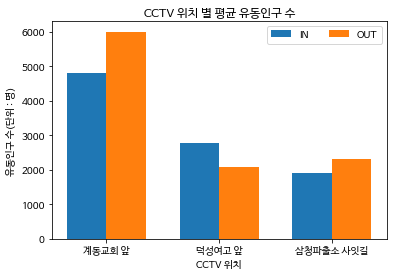

In [ ]:
w = 0.35
idx = np.arange(3)

plt.title('CCTV 위치 별 평균 유동인구 수')
plt.xlabel('CCTV 위치')
plt.ylabel('유동인구 수(단위 : 명)')
plt.bar(idx - w/2, df_device['INCOUNT'], width = w, label = 'IN')
plt.bar(idx + w/2, df_device['OUTCOUNT'], width = w, label = 'OUT')
plt.xticks(idx, df_device['DESCRIPTION'])
plt.legend(ncol = 2)
plt.show()

In [ ]:
df_day = df_new.groupby(['DESCRIPTION', 'WEEKDAY'])[['INCOUNT','OUTCOUNT']].mean().round(0).sort_values(by = ['WEEKDAY'], ascending = False).reset_index()

df_day['TOTALCOUNT'] = df_day['INCOUNT'] + df_day['OUTCOUNT']
df_day

,DESCRIPTION,WEEKDAY,INCOUNT,OUTCOUNT,TOTALCOUNT
0,계동교회 앞,평일,5136.0,6384.0,11520.0
1,덕성여고 앞,평일,3148.0,2051.0,5199.0
2,삼청파출소 사잇길,평일,1648.0,2037.0,3685.0
3,계동교회 앞,주말,4047.0,5079.0,9126.0
4,덕성여고 앞,주말,1844.0,2147.0,3991.0
5,삼청파출소 사잇길,주말,2476.0,2854.0,5330.0


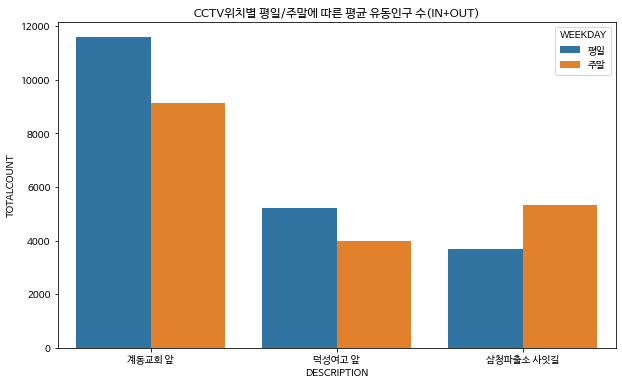

In [ ]:
plt.figure(figsize = (10,6))
sns.barplot(data = df_day, x = 'DESCRIPTION', y = 'TOTALCOUNT', hue = 'WEEKDAY')
plt.title('CCTV위치별 평일/주말에 따른 평균 유동인구 수(IN+OUT)')
plt.show()

* 북촌한옥마을과 가장 가까운 계동교회 앞쪽이 평균 유동인구가 가장 많았다. 
* 평일, 주말 상관없이 모두 계동교회 앞쪽이 평균유동인구가 가장 많았다.
* 주말에 더 유동인구가 많을 것이라고 예상했던 것과는 달리 대체로 평일에 더 유동인구가 많았고 삼청동 문화거리와 가까운 삼청파출소 사잇길쪽만 주말에 더 증가하였다.

* 분석해석
    * 북촌쪽은 출퇴근 유동인구보다는 북촌한옥마을이나 삼청동 문화거리를 목적으로 온 유동인구가 더 많은 것 같다. 그러므로 관광객을 대상으로 한 물품을 배치하는 것이 좋아보인다.(ex. 물) + 무인사물함 같은 것도 설치하는 것이 좋아보인다.
    * 특히 관광객 중 외국인도 다수 있기때문에 외국인들을 위한 물품도 배치하는 것이 좋아보인다. 출처 : https://www.donga.com/news/article/all/20230102/117264509/1

## 월별

In [ ]:
df_new['MONTH'].value_counts()

11    10496
12     8863
1      8545
10     1430
Name: MONTH, dtype: int64

* 가설 : 날이 추운 12월, 1월 보다는 10월, 11월에 유동인구가 더 많을 것이다. 또한 학교 근처인 덕성여고 앞 부근은 특히 방학시즌인 12월, 1월에 유동인구가 더 적을 것이다.

In [ ]:
# 데이터
df_month = df_new.groupby('MONTH')[['INCOUNT','OUTCOUNT']].mean().round(0).reset_index()
month_order = [1, 2, 3, 0]
df_month = df_month.loc[month_order]
df_month

,MONTH,INCOUNT,OUTCOUNT
1,10,6206.0,6715.0
2,11,5182.0,5709.0
3,12,2602.0,2734.0
0,1,2343.0,2553.0


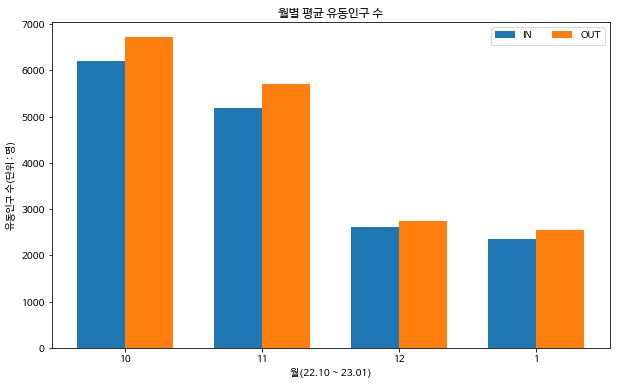

In [ ]:
w = 0.35
idx = np.arange(4)

plt.figure(figsize = (10, 6))
plt.title('월별 평균 유동인구 수')
plt.xlabel('월(22.10 ~ 23.01)')
plt.ylabel('유동인구 수(단위 : 명)')
plt.bar(idx - w/2, df_month['INCOUNT'], width = w, label = 'IN')
plt.bar(idx + w/2, df_month['OUTCOUNT'], width = w, label = 'OUT')
plt.xticks(idx, df_month['MONTH'])
plt.legend(ncol = 2)
plt.rc("axes", unicode_minus=False)
plt.show()

In [ ]:
df_month2 = df_new.groupby(['MONTH','DESCRIPTION'])[['INCOUNT','OUTCOUNT']].mean().round(0).sort_values(by = ['DESCRIPTION']).reset_index()

df_month2['TOTALCOUNT'] = df_month2['INCOUNT'] + df_month2['OUTCOUNT']
df_month2

,MONTH,DESCRIPTION,INCOUNT,OUTCOUNT,TOTALCOUNT
0,1,계동교회 앞,2496.0,3451.0,5947.0
1,10,계동교회 앞,10024.0,10652.0,20676.0
2,11,계동교회 앞,8714.0,10364.0,19078.0
3,12,계동교회 앞,2444.0,3491.0,5935.0
4,1,덕성여고 앞,2191.0,1654.0,3845.0
5,11,덕성여고 앞,3550.0,2758.0,6308.0
6,12,덕성여고 앞,2761.0,1976.0,4737.0
7,10,삼청파출소 사잇길,2388.0,2777.0,5165.0
8,11,삼청파출소 사잇길,1794.0,2179.0,3973.0


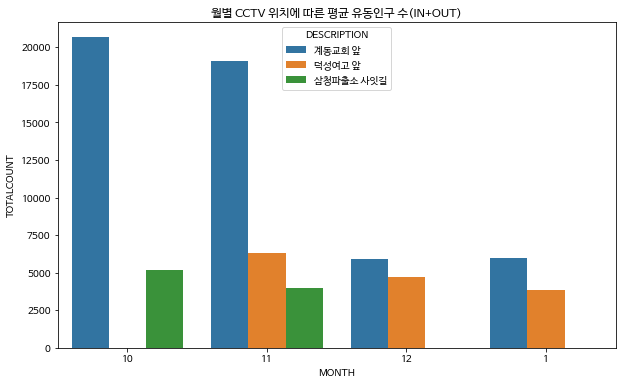

In [ ]:
plt.figure(figsize = (10,6))
sns.barplot(data = df_month2, x = 'MONTH', y = 'TOTALCOUNT', hue = 'DESCRIPTION', order = [10, 11, 12, 1])
plt.title('월별 CCTV 위치에 따른 평균 유동인구 수(IN+OUT)')
plt.show()

## 요일별

* 가설 : 다음날 출근해야하는 일요일보다는 토요일에 유동인구가 더 많을 것 같다. 평일 중에서는 내일 쉬는 날인 금요일에 유동인구가 제일 많을 것 같다. 평일 가운데인 수요일에 유동인구가 제일 적을 것 같다.

In [ ]:
df_new['MON_SUN'].value_counts()

목요일    4290
일요일    4289
금요일    4289
토요일    4289
월요일    4173
수요일    4003
화요일    4001
Name: MON_SUN, dtype: int64

In [ ]:
# 데이터
df_week = df_new.groupby('MON_SUN')[['INCOUNT','OUTCOUNT']].mean().round(0).reset_index()
week_order = [3,6,2,1,0,5,4]
df_week = df_week.loc[week_order]
df_week

,MON_SUN,INCOUNT,OUTCOUNT
3,월요일,3623.0,3981.0
6,화요일,3794.0,3893.0
2,수요일,3925.0,4053.0
1,목요일,4033.0,4180.0
0,금요일,4123.0,4257.0
5,토요일,3094.0,3772.0
4,일요일,2819.0,3447.0


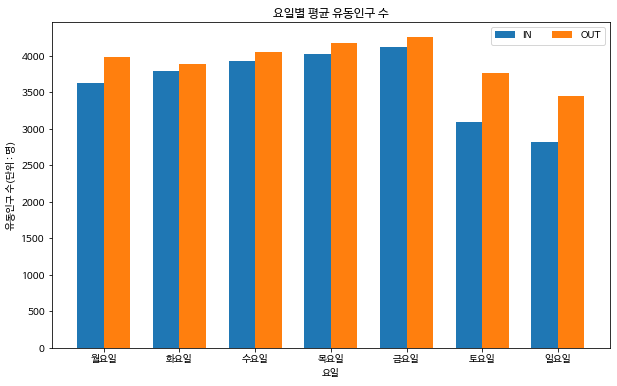

In [ ]:
w = 0.35
idx = np.arange(7)

plt.figure(figsize = (10, 6))
plt.title('요일별 평균 유동인구 수')
plt.xlabel('요일')
plt.ylabel('유동인구 수(단위 : 명)')
plt.bar(idx - w/2, df_week['INCOUNT'], width = w, label = 'IN')
plt.bar(idx + w/2, df_week['OUTCOUNT'], width = w, label = 'OUT')
plt.xticks(idx, df_week['MON_SUN'])
plt.legend(ncol = 2)
plt.show()

## 시간별

* 가설 : 새벽 시간대(0시 ~ 5시)에 유동인구가 가장 적을 것이고 출근 시간대(6시 ~ 9시)와 퇴근 시간대(18시 ~ 20시)에 유동인구가 증가했다가 그 외 시간은 점차 감소할 것 같다. 

In [ ]:
df_new['HOUR'].value_counts()

17    1236
19    1236
16    1236
15    1236
14    1236
18    1236
13    1231
1     1230
20    1230
10    1230
11    1230
5     1230
9     1230
7     1230
12    1230
3     1230
4     1230
6     1230
8     1230
2     1230
23    1224
22    1224
21    1224
0     1015
Name: HOUR, dtype: int64

In [ ]:
# 데이터
df_hour = df_new.groupby('HOUR')[['INCOUNT','OUTCOUNT']].mean().round(0).reset_index()
df_hour

,HOUR,INCOUNT,OUTCOUNT
0,0,32.0,37.0
1,1,78.0,95.0
2,2,117.0,157.0
3,3,149.0,215.0
4,4,181.0,274.0
5,5,226.0,350.0
6,6,292.0,442.0
7,7,507.0,635.0
8,8,1054.0,1064.0
9,9,1512.0,1536.0


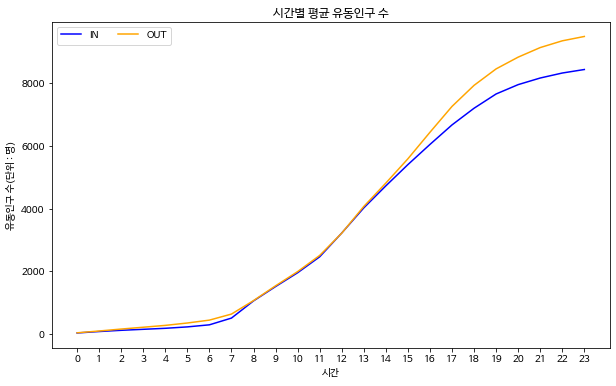

In [ ]:
plt.figure(figsize = (10, 6))
plt.title('시간별 평균 누적 유동인구 수')
plt.xlabel('시간')
plt.ylabel('유동인구 수(단위 : 명)')
plt.plot(df_hour['HOUR'], df_hour['INCOUNT'], 'b', label = 'IN')
plt.plot(df_hour['HOUR'], df_hour['OUTCOUNT'], 'orange', label = 'OUT')
plt.xticks(df_hour['HOUR'])
plt.legend(ncol = 2)
plt.show()

In [ ]:
for i in range(1, 24):
    df_hour.loc[i,"INCOUNT2"] = df_hour.loc[i, "INCOUNT"] - df_hour.loc[i-1, "INCOUNT"]
    df_hour.loc[i,"OUTCOUNT2"] = df_hour.loc[i, "OUTCOUNT"] - df_hour.loc[i-1, "OUTCOUNT"]

df_hour.loc[0,"INCOUNT2"] = df_hour.loc[0,"INCOUNT"]
df_hour.loc[0,"OUTCOUNT2"] = df_hour.loc[0,"OUTCOUNT"]
df_hour

,HOUR,INCOUNT,OUTCOUNT,INCOUNT2,OUTCOUNT2
0,0,32.0,37.0,32.0,37.0
1,1,78.0,95.0,46.0,58.0
2,2,117.0,157.0,39.0,62.0
3,3,149.0,215.0,32.0,58.0
4,4,181.0,274.0,32.0,59.0
5,5,226.0,350.0,45.0,76.0
6,6,292.0,442.0,66.0,92.0
7,7,507.0,635.0,215.0,193.0
8,8,1054.0,1064.0,547.0,429.0
9,9,1512.0,1536.0,458.0,472.0


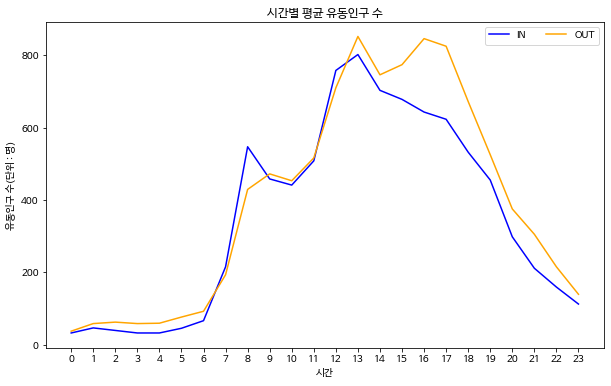

In [ ]:
plt.figure(figsize = (10, 6))
plt.title('시간별 평균 유동인구 수')
plt.xlabel('시간')
plt.ylabel('유동인구 수(단위 : 명)')
plt.plot(df_hour['HOUR'], df_hour['INCOUNT2'], 'b', label = 'IN')
plt.plot(df_hour['HOUR'], df_hour['OUTCOUNT2'], 'orange', label = 'OUT')
plt.xticks(df_hour['HOUR'])
plt.legend(ncol = 2)
plt.show()